# Wine Quality 

## Imports

In [95]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelBinarizer

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
sns.set(style="ticks", color_codes=True)
%matplotlib inline

## Variables

In [2]:
red_wine_dataset_path = 'data/winequality-red.csv'
white_wine_dataset_path = 'data/winequality-white.csv'

quality_colors = sns.husl_palette(11)

## Load data

In [3]:
red_wine_data = pd.read_csv(red_wine_dataset_path, delimiter=';')
red_wine_data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
white_wine_data = pd.read_csv(white_wine_dataset_path, delimiter=';')
white_wine_data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

## Visualize raw data
### Pair plots
#### Red wine

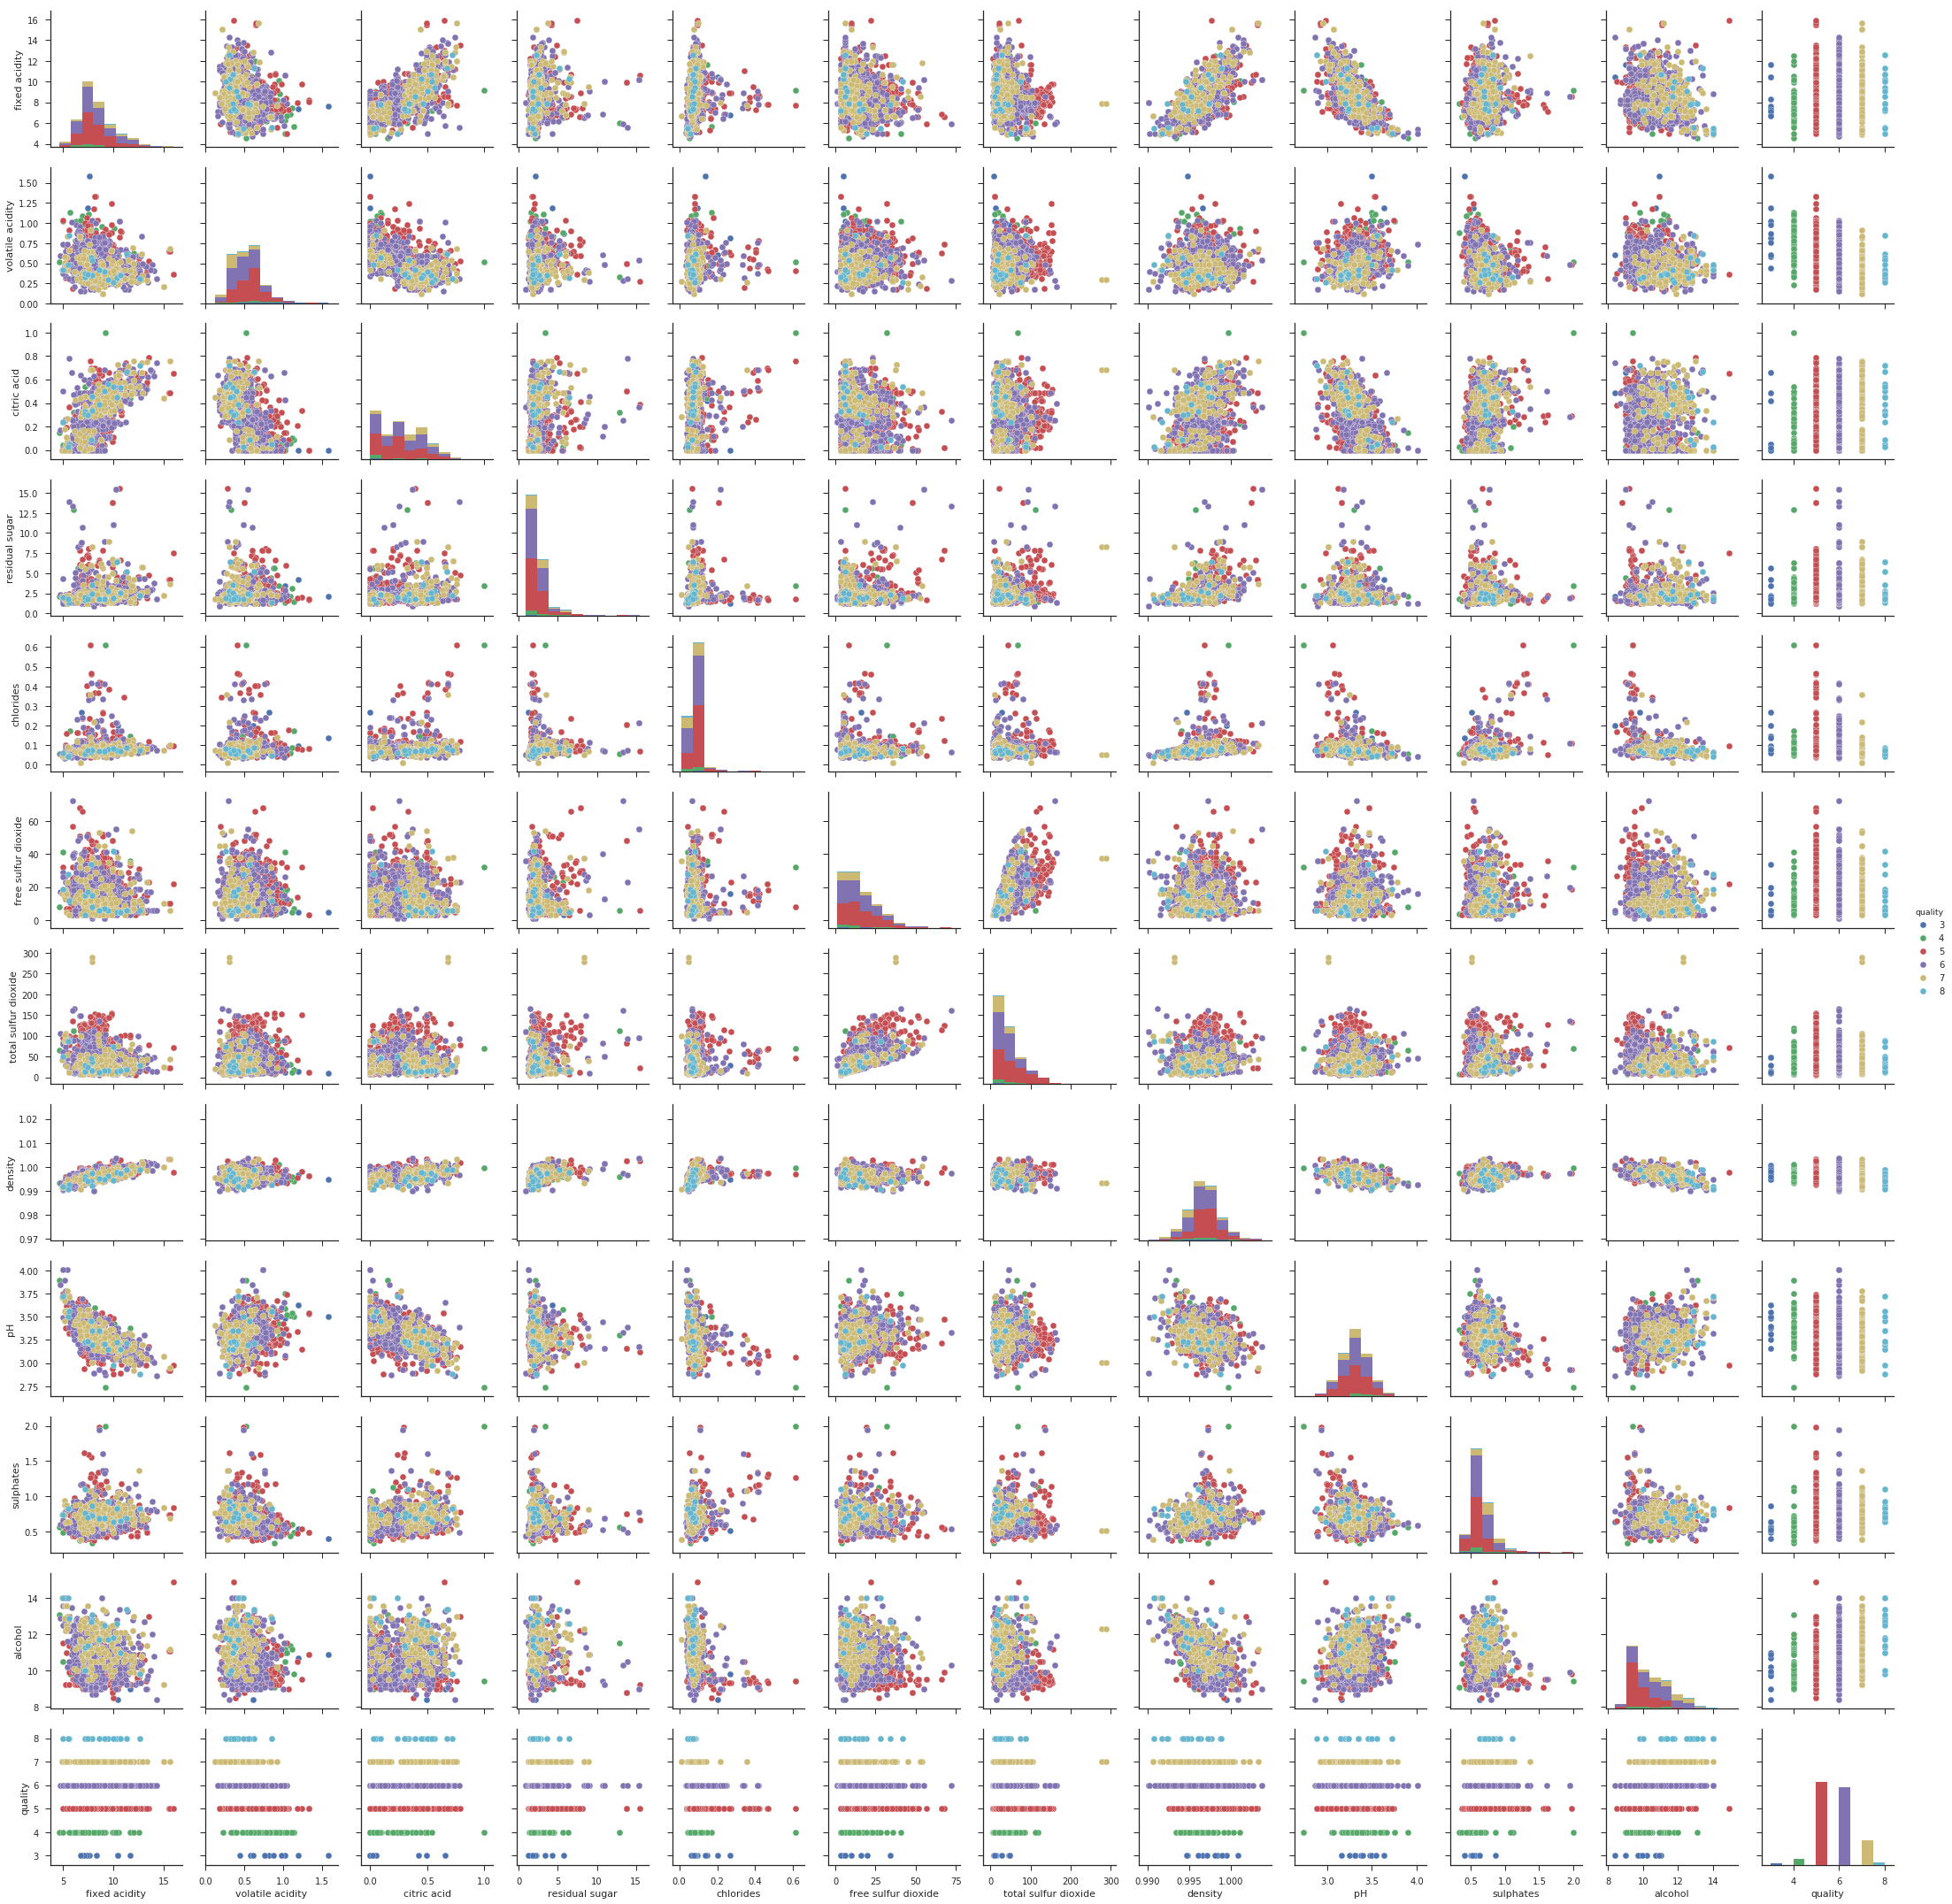

In [6]:
sns.pairplot(red_wine_data, hue='quality')

#### White wine

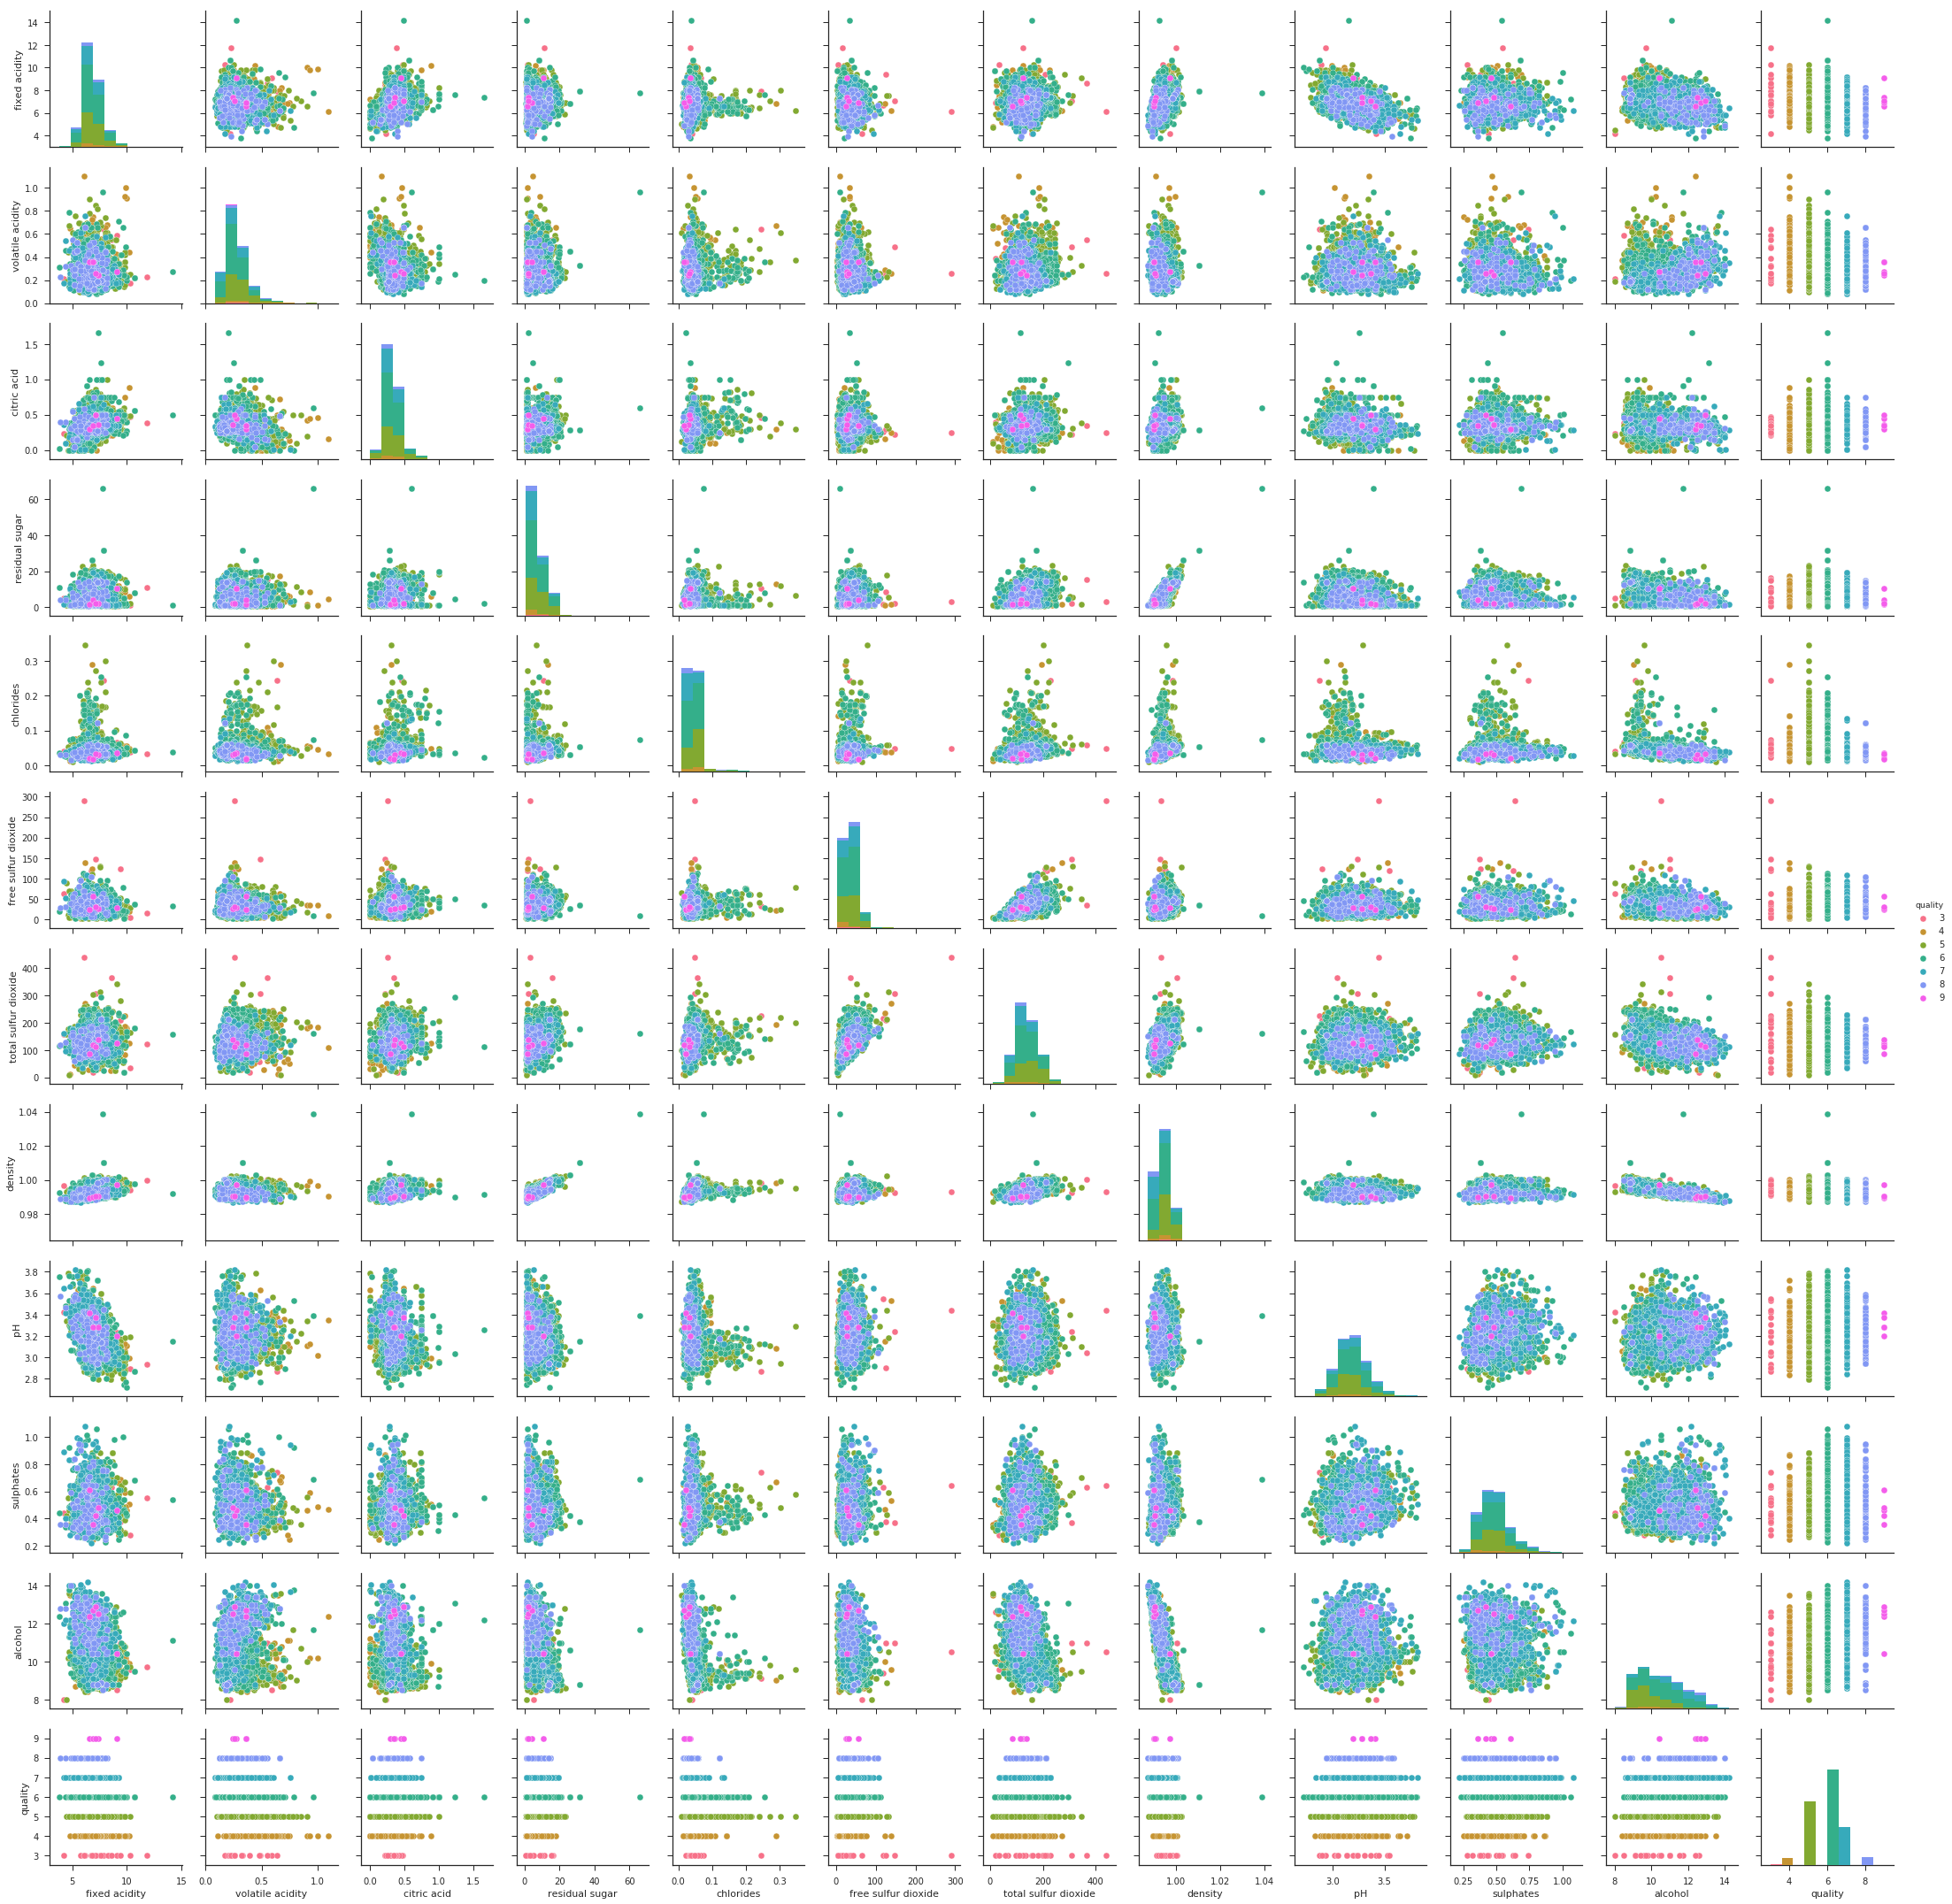

In [7]:
sns.pairplot(white_wine_data, hue='quality')

### Fixed Acidity distribution

/home/romain/Envs/wine_reviews/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Fixed Acidity distribution for the white wines according to quality')

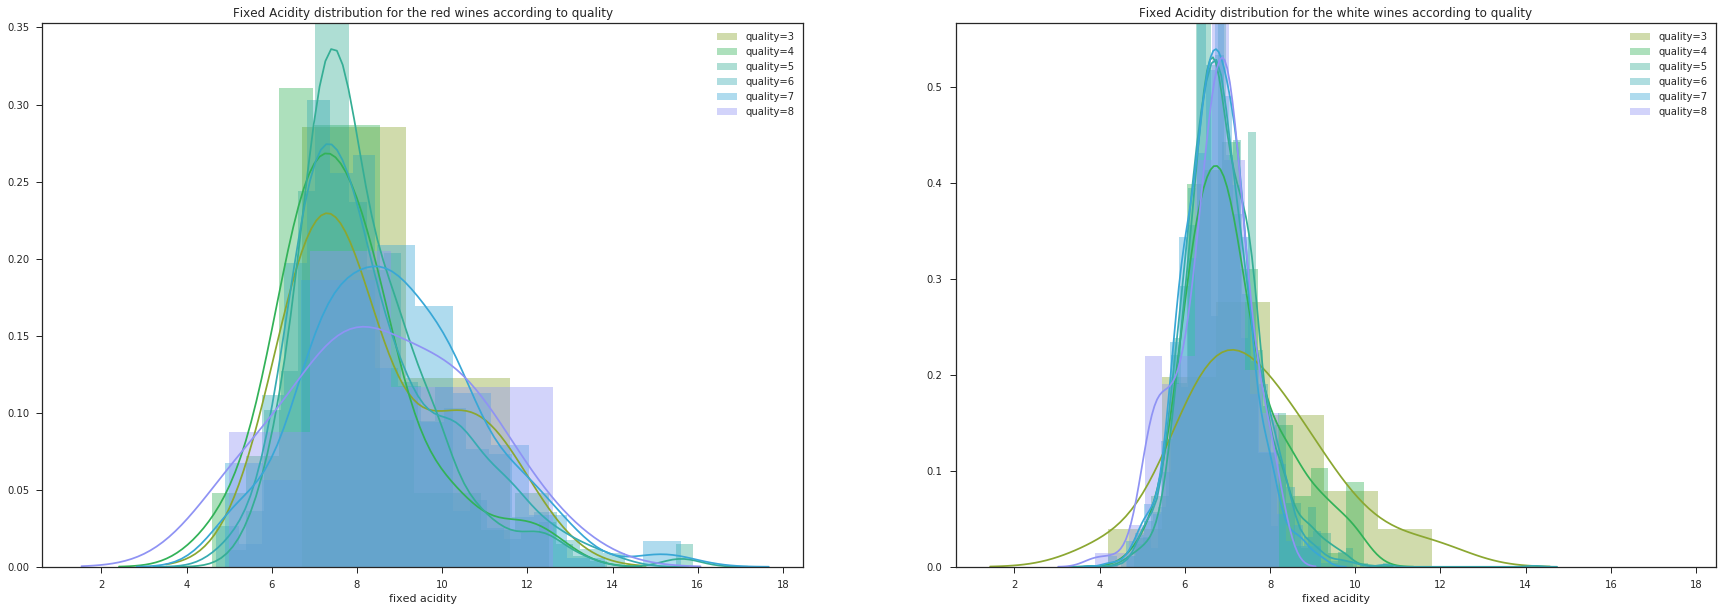

In [7]:
f, axes = plt.subplots(1, 2, figsize=(30, 10), sharex=True)
for quality in range(red_wine_data.quality.min(), red_wine_data.quality.max() + 1):
    sns.distplot(red_wine_data["fixed acidity"][red_wine_data.quality == quality], color=quality_colors[quality], ax=axes[0], label='quality=%s' % quality)
    sns.distplot(white_wine_data["fixed acidity"][white_wine_data.quality == quality], color=quality_colors[quality], ax=axes[1], label='quality=%s' % quality)
axes[0].legend()
axes[1].legend()
axes[0].set_title('Fixed Acidity distribution for the red wines according to quality')
axes[1].set_title('Fixed Acidity distribution for the white wines according to quality')

### Volatile Acidity distribution

/home/romain/Envs/wine_reviews/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Volatile Acidity distribution for the white wines according to quality')

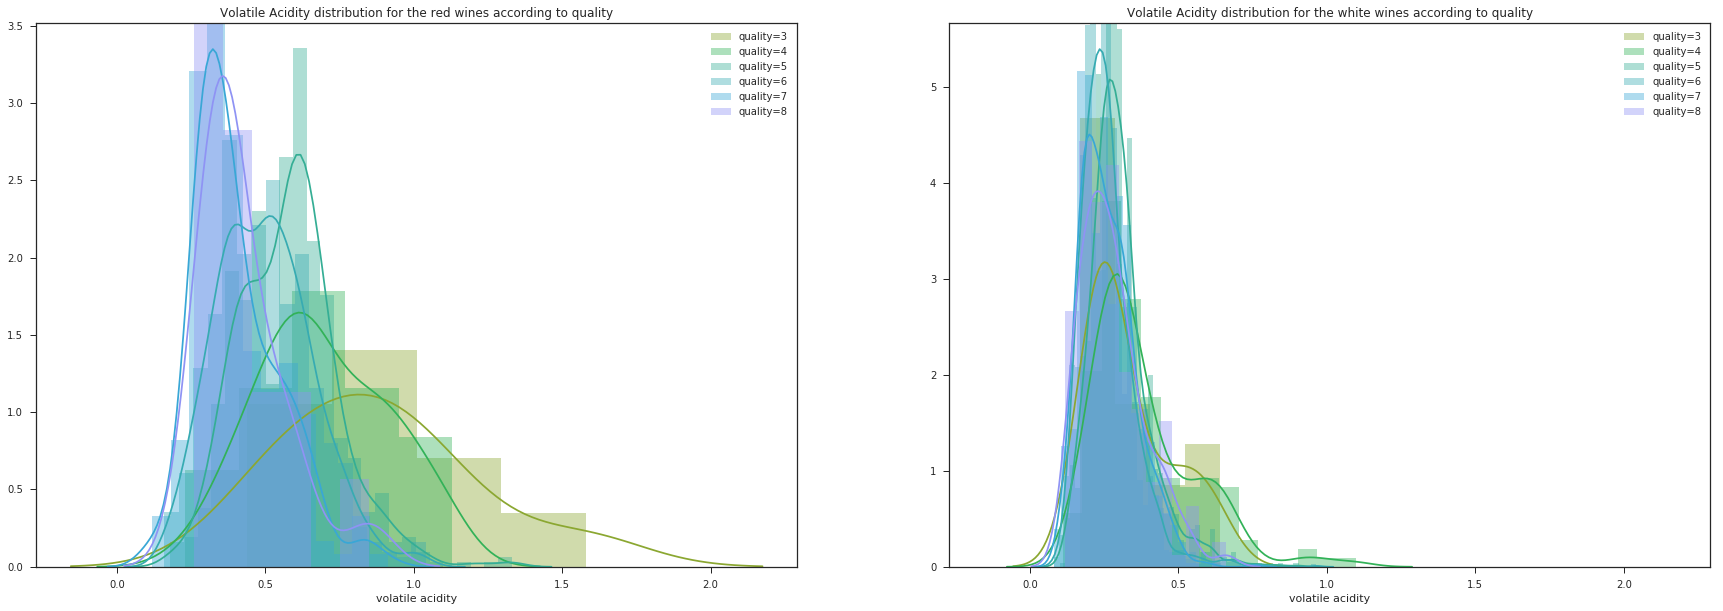

In [8]:
f, axes = plt.subplots(1, 2, figsize=(30, 10), sharex=True)
for quality in range(red_wine_data.quality.min(), red_wine_data.quality.max() + 1):
    sns.distplot(red_wine_data["volatile acidity"][red_wine_data.quality == quality], color=quality_colors[quality], ax=axes[0], label='quality=%s' % quality)
    sns.distplot(white_wine_data["volatile acidity"][white_wine_data.quality == quality], color=quality_colors[quality], ax=axes[1], label='quality=%s' % quality)
axes[0].legend()
axes[1].legend()
axes[0].set_title('Volatile Acidity distribution for the red wines according to quality')
axes[1].set_title('Volatile Acidity distribution for the white wines according to quality')

### Citric Acid distribution

/home/romain/Envs/wine_reviews/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Citric acid distribution for the white wines according to quality')

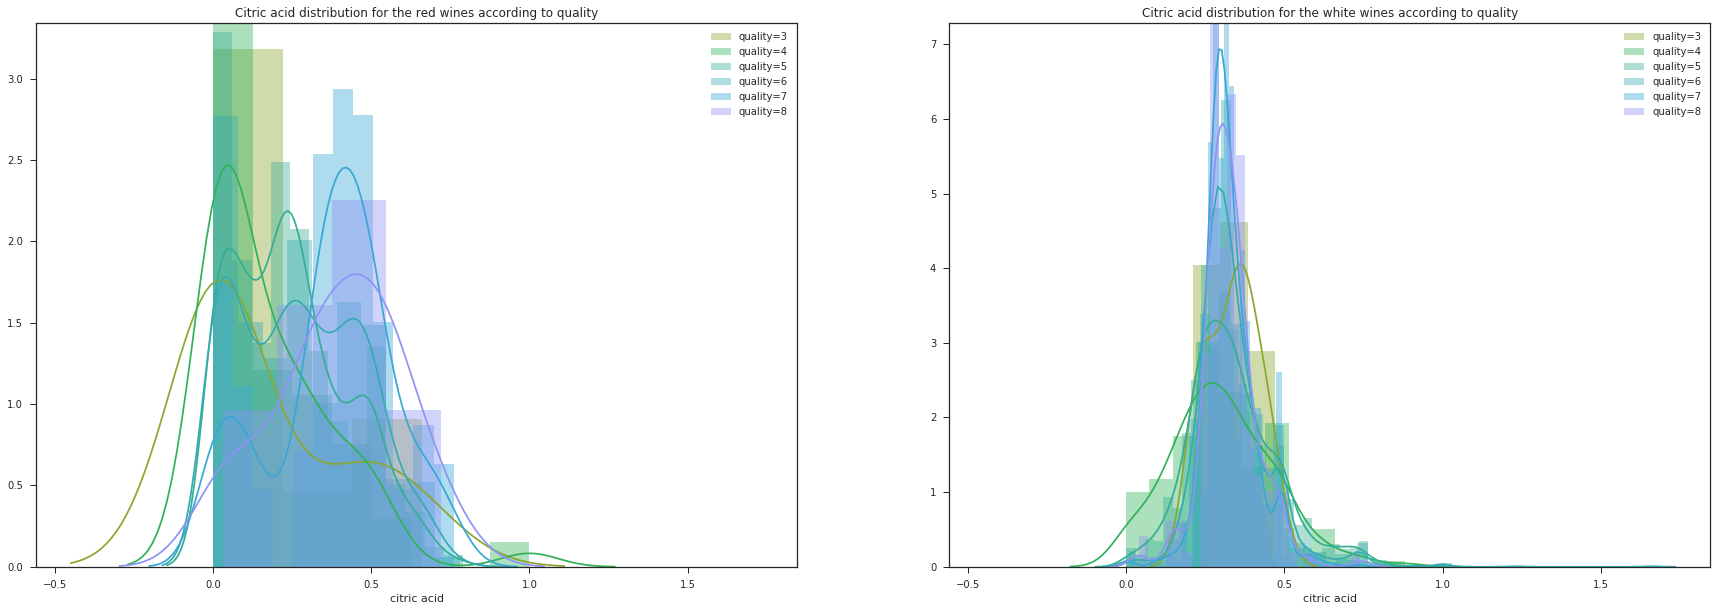

In [9]:
f, axes = plt.subplots(1, 2, figsize=(30, 10), sharex=True)
for quality in range(red_wine_data.quality.min(), red_wine_data.quality.max() + 1):
    sns.distplot(red_wine_data["citric acid"][red_wine_data.quality == quality], color=quality_colors[quality], ax=axes[0], label='quality=%s' % quality)
    sns.distplot(white_wine_data["citric acid"][white_wine_data.quality == quality], color=quality_colors[quality], ax=axes[1], label='quality=%s' % quality)
axes[0].legend()
axes[1].legend()
axes[0].set_title('Citric acid distribution for the red wines according to quality')
axes[1].set_title('Citric acid distribution for the white wines according to quality')

### Residual sugar distribution

/home/romain/Envs/wine_reviews/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Residual sugar distribution for the white wines according to quality')

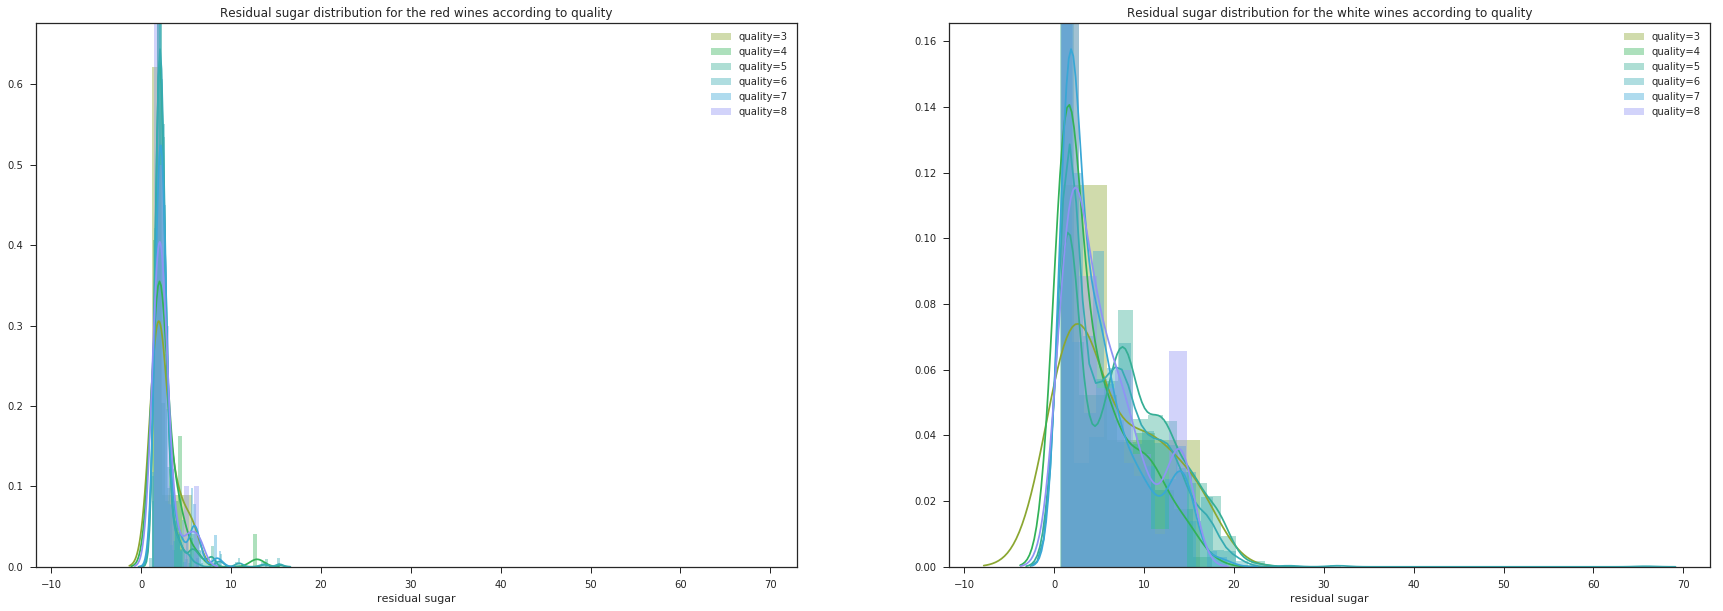

In [10]:
f, axes = plt.subplots(1, 2, figsize=(30, 10), sharex=True)
for quality in range(red_wine_data.quality.min(), red_wine_data.quality.max() + 1):
    sns.distplot(red_wine_data["residual sugar"][red_wine_data.quality == quality], color=quality_colors[quality], ax=axes[0], label='quality=%s' % quality)
    sns.distplot(white_wine_data["residual sugar"][white_wine_data.quality == quality], color=quality_colors[quality], ax=axes[1], label='quality=%s' % quality)
axes[0].legend()
axes[1].legend()
axes[0].set_title('Residual sugar distribution for the red wines according to quality')
axes[1].set_title('Residual sugar distribution for the white wines according to quality')

### Chlorides distribution

/home/romain/Envs/wine_reviews/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Chlorides distribution for the white wines according to quality')

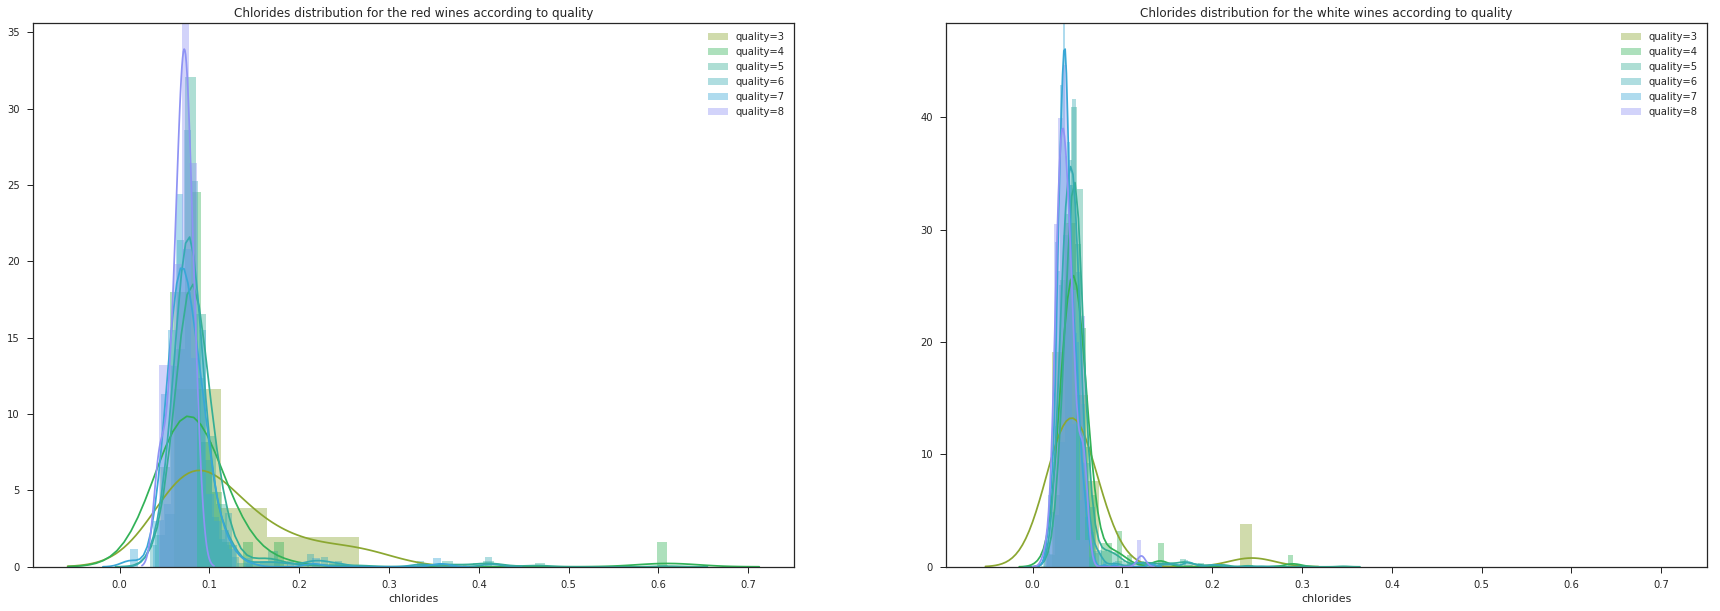

In [11]:
f, axes = plt.subplots(1, 2, figsize=(30, 10), sharex=True)
for quality in range(red_wine_data.quality.min(), red_wine_data.quality.max() + 1):
    sns.distplot(red_wine_data["chlorides"][red_wine_data.quality == quality], color=quality_colors[quality], ax=axes[0], label='quality=%s' % quality)
    sns.distplot(white_wine_data["chlorides"][white_wine_data.quality == quality], color=quality_colors[quality], ax=axes[1], label='quality=%s' % quality)
axes[0].legend()
axes[1].legend()
axes[0].set_title('Chlorides distribution for the red wines according to quality')
axes[1].set_title('Chlorides distribution for the white wines according to quality')

### Free sulfur dioxide distribution

/home/romain/Envs/wine_reviews/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Free sulfur dioxide distribution for the white wines according to quality')

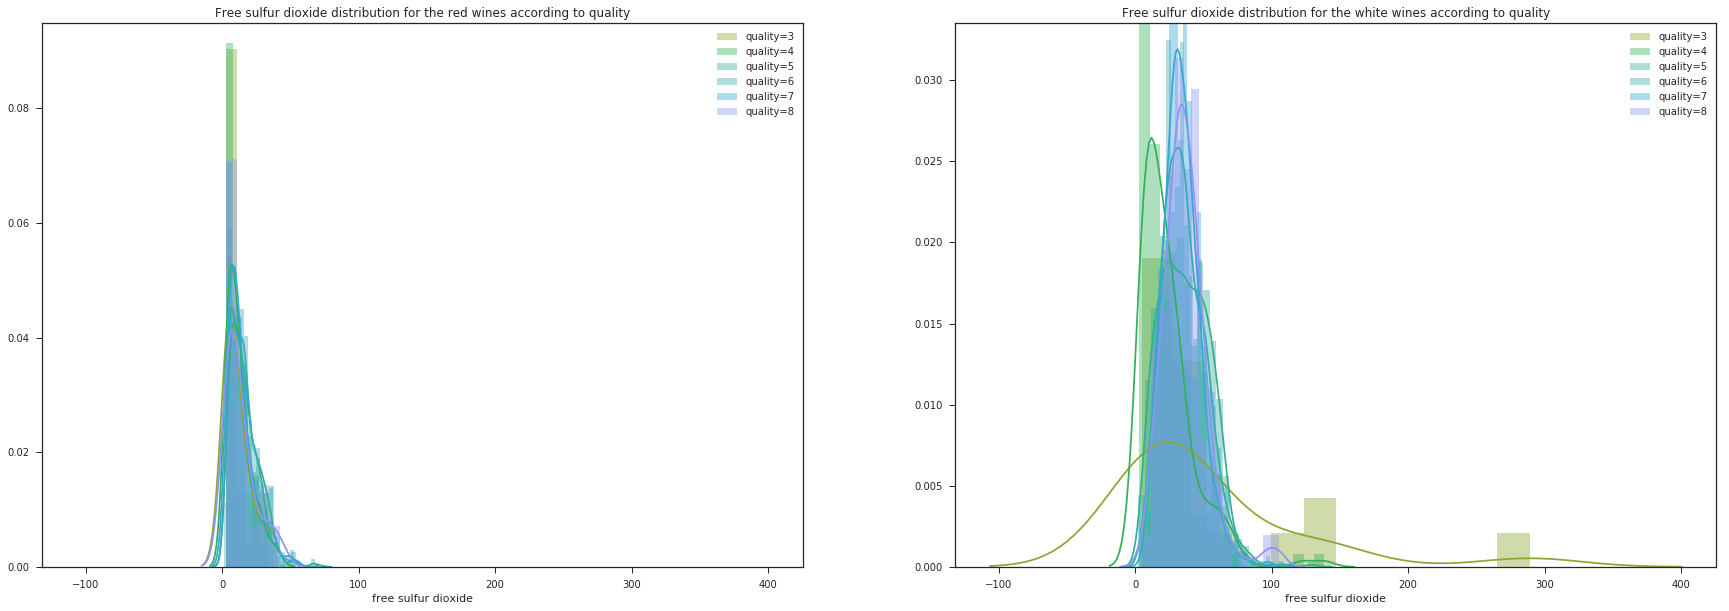

In [12]:
f, axes = plt.subplots(1, 2, figsize=(30, 10), sharex=True)
for quality in range(red_wine_data.quality.min(), red_wine_data.quality.max() + 1):
    sns.distplot(red_wine_data["free sulfur dioxide"][red_wine_data.quality == quality], color=quality_colors[quality], ax=axes[0], label='quality=%s' % quality)
    sns.distplot(white_wine_data["free sulfur dioxide"][white_wine_data.quality == quality], color=quality_colors[quality], ax=axes[1], label='quality=%s' % quality)
axes[0].legend()
axes[1].legend()
axes[0].set_title('Free sulfur dioxide distribution for the red wines according to quality')
axes[1].set_title('Free sulfur dioxide distribution for the white wines according to quality')

### Total sulfur dioxide distribution

/home/romain/Envs/wine_reviews/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Total sulfur dioxide distribution for the white wines according to quality')

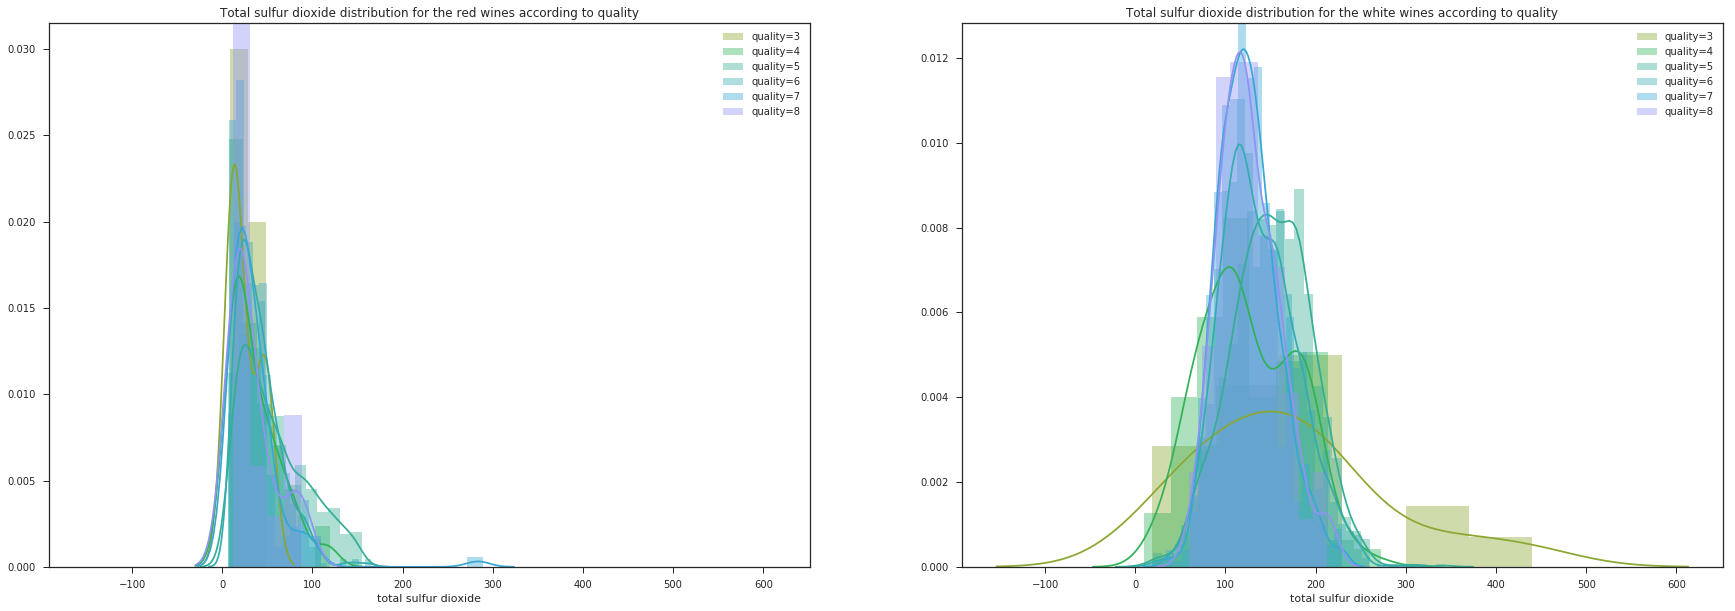

In [13]:
f, axes = plt.subplots(1, 2, figsize=(30, 10), sharex=True)
for quality in range(red_wine_data.quality.min(), red_wine_data.quality.max() + 1):
    sns.distplot(red_wine_data["total sulfur dioxide"][red_wine_data.quality == quality], color=quality_colors[quality], ax=axes[0], label='quality=%s' % quality)
    sns.distplot(white_wine_data["total sulfur dioxide"][white_wine_data.quality == quality], color=quality_colors[quality], ax=axes[1], label='quality=%s' % quality)
axes[0].legend()
axes[1].legend()
axes[0].set_title('Total sulfur dioxide distribution for the red wines according to quality')
axes[1].set_title('Total sulfur dioxide distribution for the white wines according to quality')

### Density distribution

/home/romain/Envs/wine_reviews/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Density distribution for the white wines according to quality')

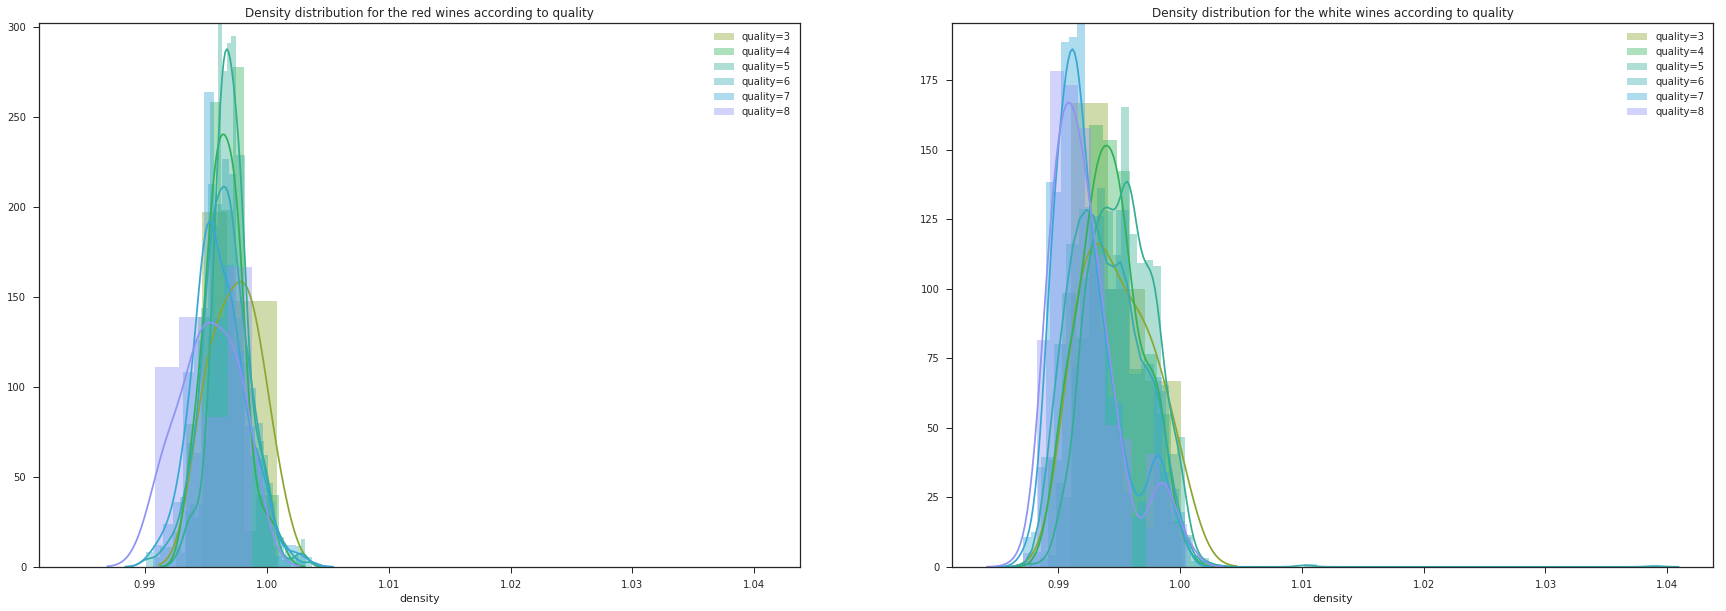

In [14]:
f, axes = plt.subplots(1, 2, figsize=(30, 10), sharex=True)
for quality in range(red_wine_data.quality.min(), red_wine_data.quality.max() + 1):
    sns.distplot(red_wine_data["density"][red_wine_data.quality == quality], color=quality_colors[quality], ax=axes[0], label='quality=%s' % quality)
    sns.distplot(white_wine_data["density"][white_wine_data.quality == quality], color=quality_colors[quality], ax=axes[1], label='quality=%s' % quality)
axes[0].legend()
axes[1].legend()
axes[0].set_title('Density distribution for the red wines according to quality')
axes[1].set_title('Density distribution for the white wines according to quality')

### pH distribution

/home/romain/Envs/wine_reviews/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'pH distribution for the white wines according to quality')

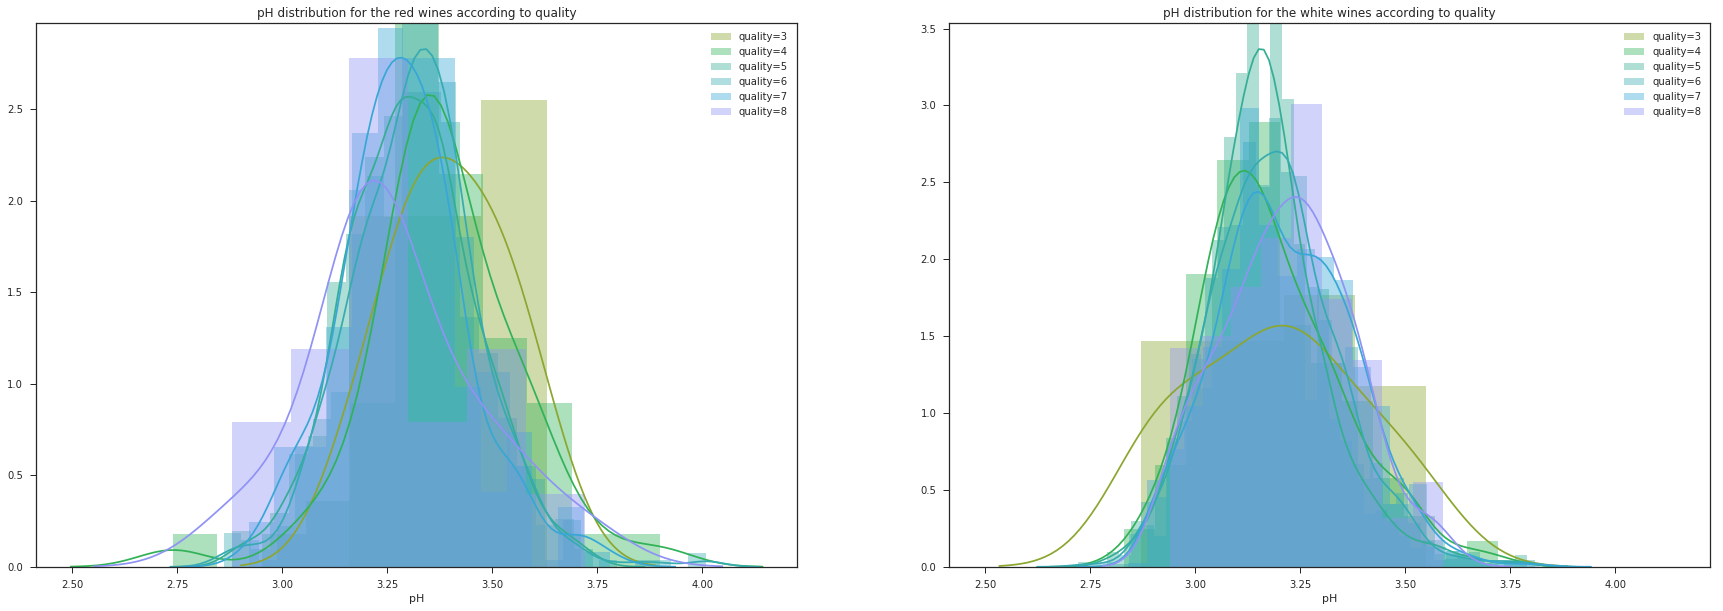

In [15]:
f, axes = plt.subplots(1, 2, figsize=(30, 10), sharex=True)
for quality in range(red_wine_data.quality.min(), red_wine_data.quality.max() + 1):
    sns.distplot(red_wine_data["pH"][red_wine_data.quality == quality], color=quality_colors[quality], ax=axes[0], label='quality=%s' % quality)
    sns.distplot(white_wine_data["pH"][white_wine_data.quality == quality], color=quality_colors[quality], ax=axes[1], label='quality=%s' % quality)
axes[0].legend()
axes[1].legend()
axes[0].set_title('pH distribution for the red wines according to quality')
axes[1].set_title('pH distribution for the white wines according to quality')

### Sulphates distribution

/home/romain/Envs/wine_reviews/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Sulphates distribution for the white wines according to quality')

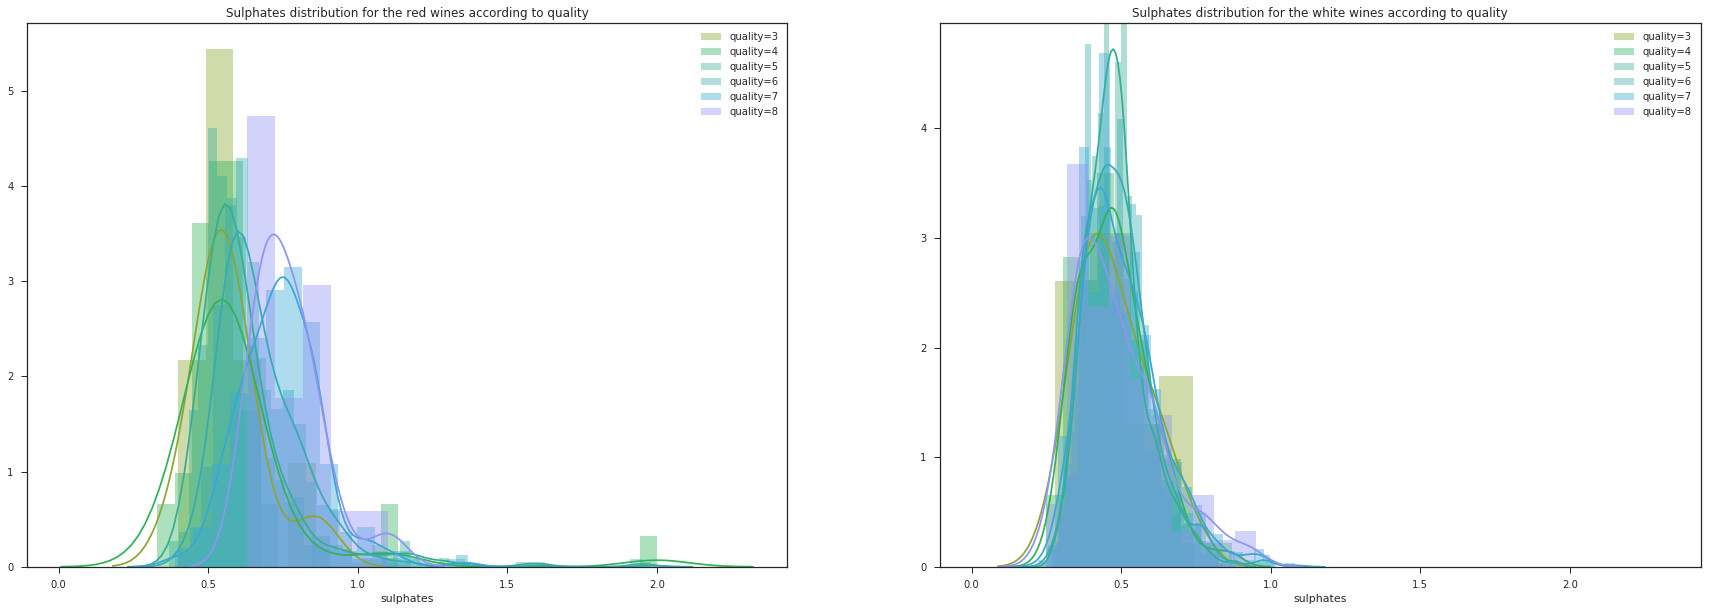

In [16]:
f, axes = plt.subplots(1, 2, figsize=(30, 10), sharex=True)
for quality in range(red_wine_data.quality.min(), red_wine_data.quality.max() + 1):
    sns.distplot(red_wine_data["sulphates"][red_wine_data.quality == quality], color=quality_colors[quality], ax=axes[0], label='quality=%s' % quality)
    sns.distplot(white_wine_data["sulphates"][white_wine_data.quality == quality], color=quality_colors[quality], ax=axes[1], label='quality=%s' % quality)
axes[0].legend()
axes[1].legend()
axes[0].set_title('Sulphates distribution for the red wines according to quality')
axes[1].set_title('Sulphates distribution for the white wines according to quality')

### Alcohol distribution

/home/romain/Envs/wine_reviews/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Alcohol distribution for the white wines according to quality')

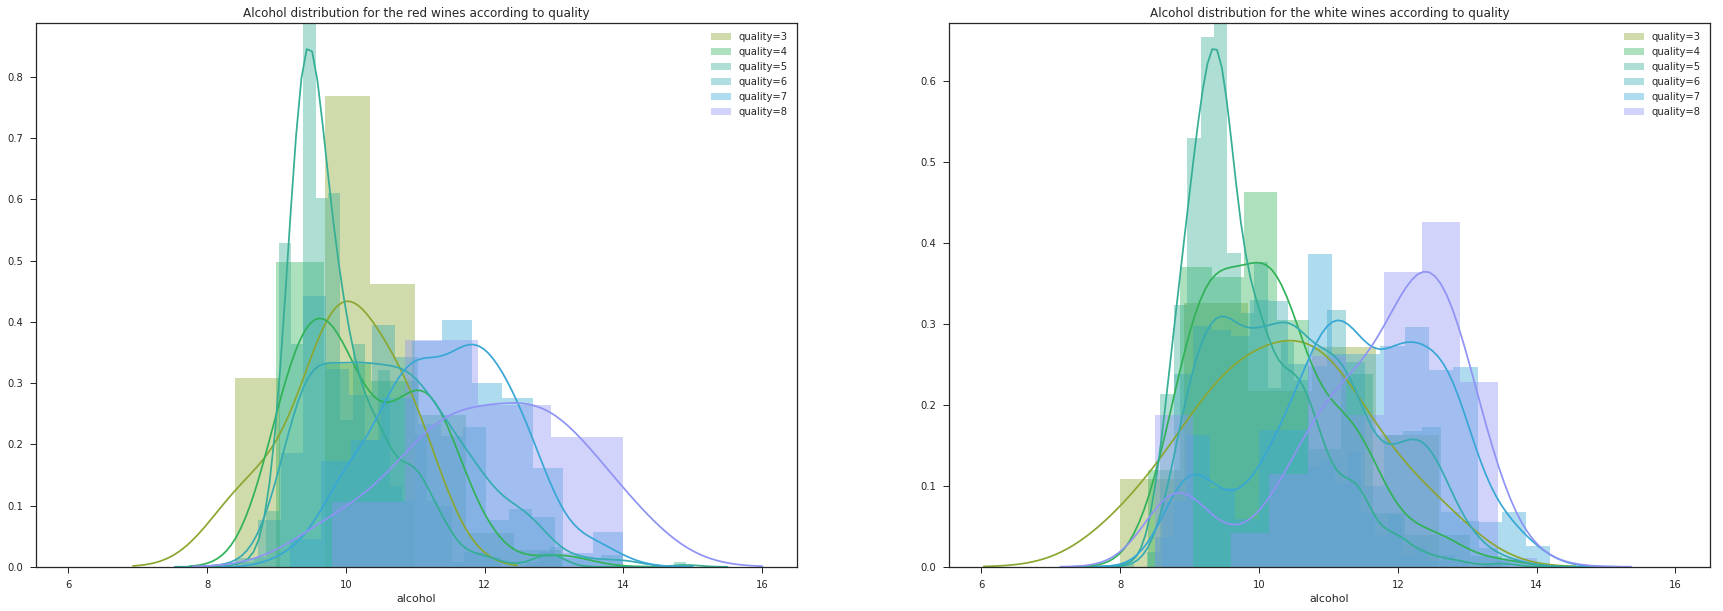

In [17]:
f, axes = plt.subplots(1, 2, figsize=(30, 10), sharex=True)
for quality in range(red_wine_data.quality.min(), red_wine_data.quality.max() + 1):
    sns.distplot(red_wine_data["alcohol"][red_wine_data.quality == quality], color=quality_colors[quality], ax=axes[0], label='quality=%s' % quality)
    sns.distplot(white_wine_data["alcohol"][white_wine_data.quality == quality], color=quality_colors[quality], ax=axes[1], label='quality=%s' % quality)
axes[0].legend()
axes[1].legend()
axes[0].set_title('Alcohol distribution for the red wines according to quality')
axes[1].set_title('Alcohol distribution for the white wines according to quality')

## Classification

In [64]:
standardizer = StandardScaler()

X_red_wine = red_wine_data.drop('quality', axis=1).values
y_red_wine = red_wine_data.quality.values

X_red_wine_standardized = standardizer.fit_transform(X_red_wine)
X_train_red_wine, X_test_red_wine, y_train_red_wine, y_test_red_wine = train_test_split(X_red_wine_standardized,
                                                                                        y_red_wine,
                                                                                        random_state=0)

X_white_wine = white_wine_data.drop('quality', axis=1).values
y_white_wine = white_wine_data.quality.values
X_white_wine_standardized = standardizer.fit_transform(X_white_wine)
X_train_white_wine, X_test_white_wine, y_train_white_wine, y_test_white_wine = train_test_split(X_white_wine_standardized,
                                                                                                y_white_wine,
                                                                                                random_state=0)
def assess_model(model, model_name):
    model.fit(X_train_red_wine, y_train_red_wine)
    y_pred_red_wine = model.predict(X_test_red_wine)
        
    model.fit(X_train_white_wine, y_train_white_wine)
    y_pred_white_wine = model.predict(X_test_white_wine)
    
    red_wine_mat = confusion_matrix(y_test_red_wine, y_pred_red_wine)
    white_wine_mat = confusion_matrix(y_test_white_wine, y_pred_white_wine)
    
    f, axes = plt.subplots(1, 2, figsize=(20, 10), sharex=True)
    sns.heatmap(red_wine_mat.T,
                square=True, 
                annot=True, 
                fmt='d', 
                cbar=False,
                xticklabels=range(red_wine_data.quality.min(), red_wine_data.quality.max() + 1), 
                yticklabels=range(red_wine_data.quality.min(), red_wine_data.quality.max() + 1),
                ax=axes[0])
    sns.heatmap(white_wine_mat.T,
                square=True, 
                annot=True, 
                fmt='d', 
                cbar=False,
                xticklabels=range(red_wine_data.quality.min(), red_wine_data.quality.max() + 1), 
                yticklabels=range(red_wine_data.quality.min(), red_wine_data.quality.max() + 1),
                ax=axes[1])
    axes[0].set_xlabel('True label')
    axes[0].set_ylabel('Predicted label')
    axes[1].set_xlabel('True label')
    axes[1].set_ylabel('Predicted label')
    axes[0].set_title('Red wine %s, accuracy = %s' % (model_name, accuracy_score(y_test_red_wine, y_pred_red_wine)))
    axes[1].set_title('White wine %s, accuracy = %s' % (model_name, accuracy_score(y_test_white_wine, y_pred_white_wine)))

### Naive Bayes

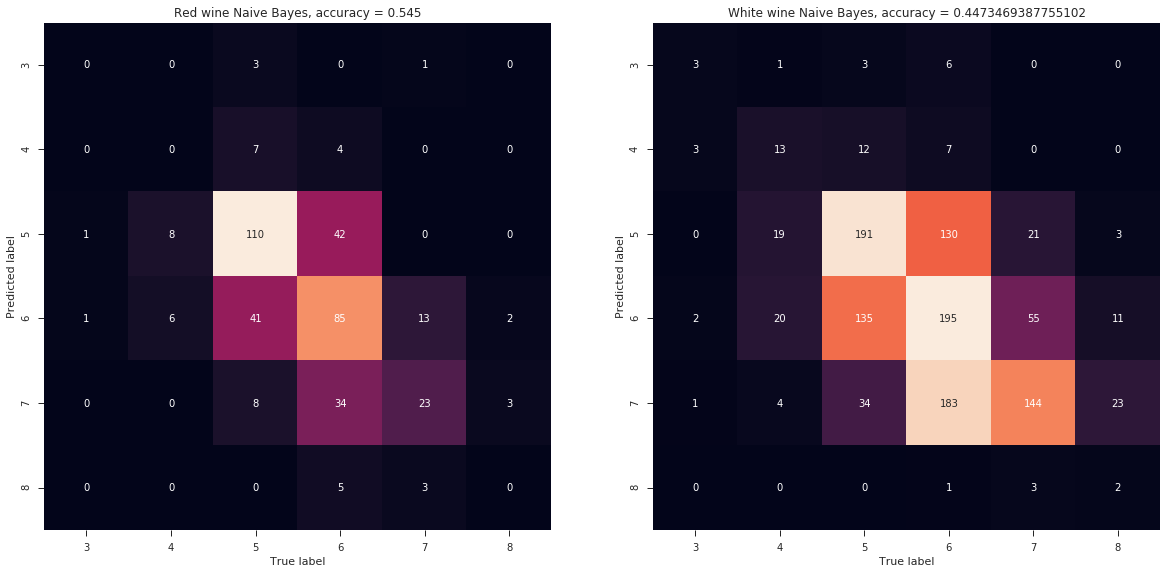

In [65]:
model = GaussianNB()
assess_model(model, 'Naive Bayes')

### SVM

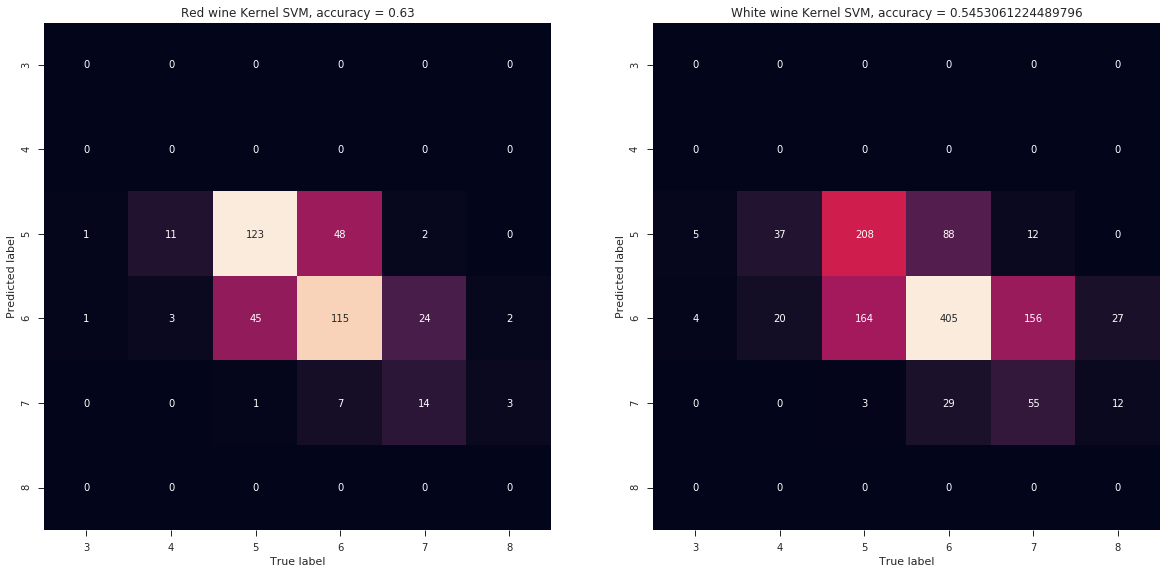

In [66]:
model = SVC(kernel='rbf', C=1)
assess_model(model, 'Kernel SVM')

### RandomForest

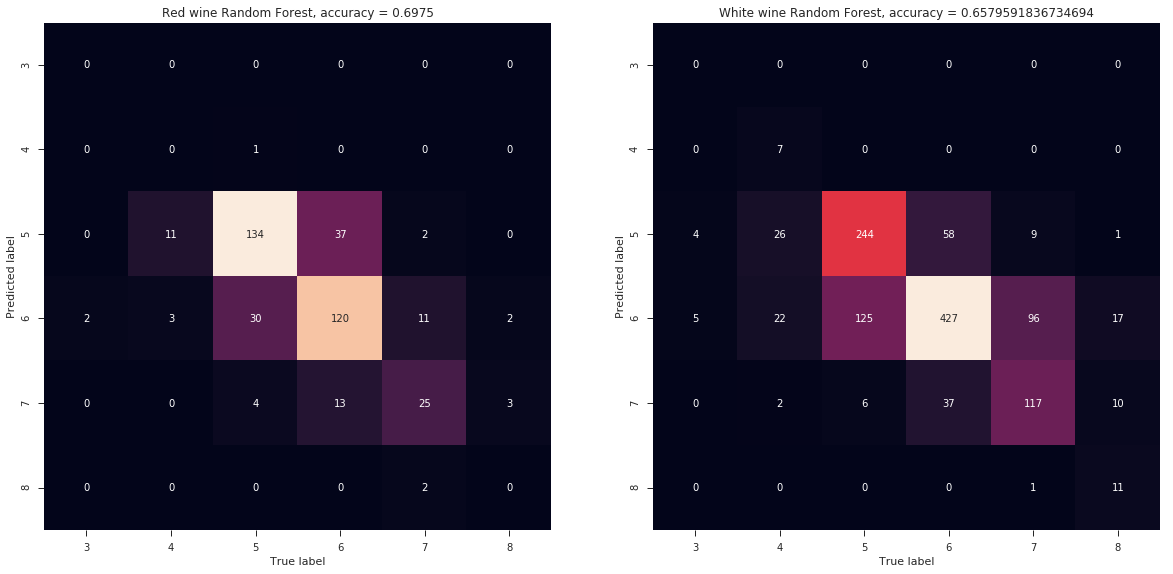

In [67]:
model = RandomForestClassifier(n_estimators=100)
assess_model(model, 'Random Forest')

### Neural Networks

In [102]:
label_encoder = LabelBinarizer()
label_encoder.fit(range(11))
y_train_red_wine_nn = label_encoder.transform(y_train_red_wine)
y_test_red_wine_nn = label_encoder.transform(y_test_red_wine)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(11, )))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(11, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())
model.fit(X_train_red_wine, y_train_red_wine_nn, epochs=100, validation_data=(X_test_red_wine, y_test_red_wine_nn))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 64)                768       
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_92 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_93 (Dense)             (None, 11)                1419      
Total params: 10,507
Trainable params: 10,507
Non-trainable params: 0
_________________________________________________________________
None
Train on 1199 samples, validate on 400 samples
Epoch 1/100
1199/1199 [==============================] - 0s 402us/step - loss: 1.6814 

In [ ]:
y_train_red_wine_nn

## PCA

### On red wine data

Text(0,0.5,'Cumulated explained variance')

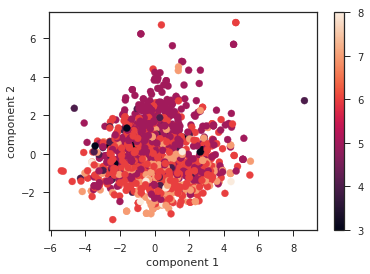

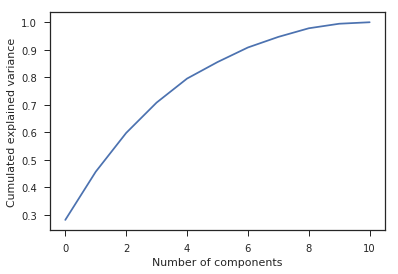

In [36]:
pca = PCA(n_components=2)
projected = pca.fit_transform(X_red_wine_standardized)
plt.scatter(projected[:, 0], projected[:, 1],
           c=red_wine_data.quality)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

pca = PCA().fit(X_red_wine_standardized)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulated explained variance')

In [62]:
pipe = Pipeline([
    ('reduce_dim', PCA()),
    ('classify', RandomForestClassifier())
])

param_grid = {
        'reduce_dim__n_components': [2, 3, 4, 5, 6, 7, 8, 9, 10],
        'classify__n_estimators': [5, 20, 100, 1000]
}
grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=param_grid)
grid.fit(X_red_wine_standardized, y_red_wine)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('classify', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=Non...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'reduce_dim__n_components': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'classify__n_estimators': [5, 20, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [72]:
grid.cv_results_['mean_test_score']
X_red_wine.shape

(1599, 11)

### On white wine

[[ 1.54452453e-03  1.69030937e-04  3.38646756e-04  4.73275083e-02
   9.75793989e-05  2.61872279e-01  9.63853329e-01  3.59706391e-05
   3.36199734e-06  3.40888191e-04 -1.25043553e-02 -3.28041170e-03]
 [-9.16673296e-03 -1.54624759e-03  1.40367326e-04  1.49314295e-02
  -7.20390584e-05  9.64637649e-01 -2.62682018e-01 -1.83976939e-05
  -4.08057870e-05 -3.60533010e-04  6.47965595e-03  1.09933430e-02]]


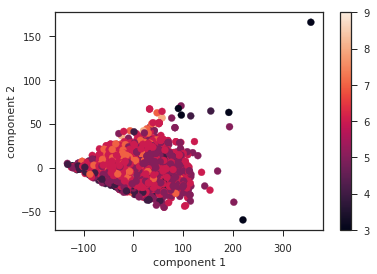

In [92]:
pca = PCA(n_components=2).fit(white_wine_data)
projected = pca.transform(white_wine_data)
plt.scatter(projected[:, 0], projected[:, 1],
           c=white_wine_data.quality)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
print(pca.components_)

